In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Preprocessing of Data

# Loading of dataset (PSEI)
# We will only use the closing prices, hence we set usecols to index:4
data = np.genfromtxt('data/PSEI.csv', delimiter=',', skip_header=1, usecols=4)

# Splitting of dataset for training (80%) and testing (20%)
# Split data into training and testing
len_train = int(len(data) * 0.80)
data_train = data[:len_train]
data_test = data[len_train:]

# Creating a windowed datasets for training, using the following window sizes (5, 10, 15, 20)
windowed_sizes = [5, 10, 15, 20]
windowed_data_train = [0, 0, 0, 0]

idx_counter = 0
for window_size in windowed_sizes:
    train_data = np.zeros((len(data_train) - window_size, window_size))
    for i in range(len(data_train) - window_size):
        train_data[i] = data_train[i:i + window_size]
    windowed_data_train[idx_counter] = train_data
    idx_counter += 1

y_data_train = [[], [], [], []]
# For y_data_train, in window_size = 5
for i in range(len(windowed_data_train[0])):
    y_data_train[0].append(windowed_data_train[0][i][1])
# For y_data_train, in window_size = 10
for i in range(len(windowed_data_train[1])):
    y_data_train[1].append(windowed_data_train[1][i][1])
# For y_data_train, in window_size = 15
for i in range(len(windowed_data_train[2])):
    y_data_train[2].append(windowed_data_train[2][i][1])
# For y_data_train, in window_size = 20
for i in range(len(windowed_data_train[3])):
    y_data_train[3].append(windowed_data_train[3][i][1])


# Creating a windowed datasets for testing, using the following window sizes (5, 10, 15, 20)
windowed_sizes = [5, 10, 15, 20]
windowed_data_test = [0, 0, 0, 0]

idx_counter = 0
for window_size in windowed_sizes:
    test_data = np.zeros((len(data_test) - window_size, window_size))
    for i in range(len(data_test) - window_size):
        test_data[i] = data_test[i:i + window_size]
    windowed_data_test[idx_counter] = test_data
    idx_counter += 1

y_data_test = [[], [], [], []]
# For y_data_test, in window_size = 5
for i in range(len(windowed_data_test[0])):
    y_data_test[0].append(windowed_data_test[0][i][1])
# For y_data_test, in window_size = 10
for i in range(len(windowed_data_test[1])):
    y_data_test[1].append(windowed_data_test[1][i][1])
# For y_data_test, in window_size = 15
for i in range(len(windowed_data_test[2])):
    y_data_test[2].append(windowed_data_test[2][i][1])
# For y_data_test, in window_size = 20
for i in range(len(windowed_data_test[3])):
    y_data_test[3].append(windowed_data_test[3][i][1])

In [3]:
# Load the model
neural_model = model = tf.keras.models.load_model('exported_models/model_s5.keras')

In [ ]:
neural_model.summary()

In [4]:
pred_s5 = neural_model.predict(windowed_data_train[0])
print(f"Shape of pred: {pred_s5.shape}\nPred: {pred_s5}")

142/142 [==============================] - 0s 992us/step
Shape of pred: (4535, 1)
Pred: [[2153.1858]
 [2074.744 ]
 [2079.1008]
 ...
 [7176.42  ]
 [7066.5503]
 [7193.6587]]


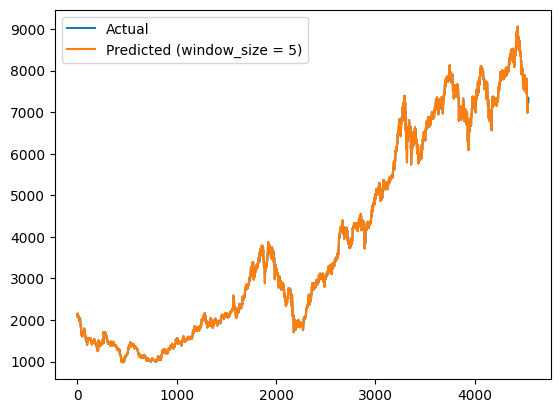

In [5]:
# Plot actual vs predicted (train)
import matplotlib.pyplot as plt

plt.plot(data_train, label='Actual')
plt.plot(pred_s5, label='Predicted (window_size = 5)')
plt.legend()
plt.show()

36/36 [==============================] - 0s 1ms/step


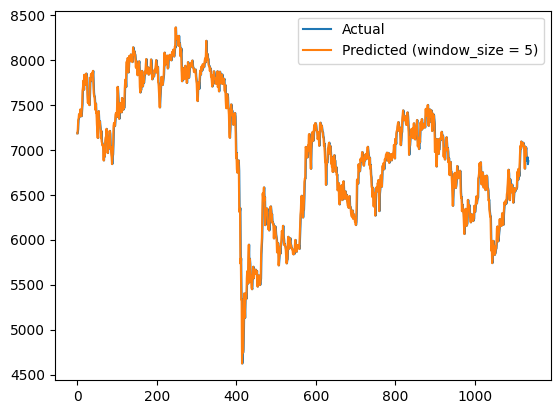

In [6]:
# Plot actual vs predicted (test)
pred_on_test = neural_model.predict(windowed_data_test[0])

plt.plot(data_test, label='Actual')
plt.plot(pred_on_test, label='Predicted (window_size = 5)')
plt.legend()
plt.show()